In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-shopping-trends-dataset/shopping_trends.csv
/kaggle/input/customer-shopping-trends-dataset/shopping_trends_updated.csv


# Customer Shopping Behavior Analysis

## Project Objective
The goal of this project is to analyze customer shopping behavior to uncover spending patterns, category preferences, and the impact of discounts on purchase amounts. The insights from this analysis can help businesses improve pricing strategies and customer targeting.


In [2]:
import os

for dirname, _, filenames in os.walk("/kaggle/input"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customer-shopping-trends-dataset/shopping_trends.csv
/kaggle/input/customer-shopping-trends-dataset/shopping_trends_updated.csv


In [3]:
## Import all the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [4]:
## Load the dataset
df = pd.read_csv("/kaggle/input/customer-shopping-trends-dataset/shopping_trends_updated.csv")
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
## Shape of the data 
df.shape

## Column names and data types
df.info()

## Statistical Summary
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


## Dataset Overview

The dataset contains customer-level shopping data, including demographic information, product categories, purchase amounts, and discount usage. Each row represents an individual customer transaction.


# Data Cleaning + Column Renaming

## Data Cleaning
In this section, we clean the dataset by checking for missing values, ensuring correct data types, and standardizing column names for easier analysis.


In [6]:
## Check for number of missing values in each column
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [7]:
## Clean up column names -- all lower case, with underscores for spaces and no special characters
df.columns = (
    df.columns
        .str.lower()
        .str.replace(" ", "_")
        .str.replace("(", "")
        .str.replace(")", "")
)

df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_usd', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases'],
      dtype='object')

In [8]:
## Check for any inconsistencies in the data types of columns
df.dtypes

customer_id                 int64
age                         int64
gender                     object
item_purchased             object
category                   object
purchase_amount_usd         int64
location                   object
size                       object
color                      object
season                     object
review_rating             float64
subscription_status        object
shipping_type              object
discount_applied           object
promo_code_used            object
previous_purchases          int64
payment_method             object
frequency_of_purchases     object
dtype: object

### Cleaning Summary
- The dataset contains minimal missing values.
- Column names were standardized for consistency.
- Data types were verified and found to be appropriate for analysis.


# Exploratory Data Analysis

## Exploratory Data Analysis (EDA)
In this section, we explore customer spending patterns, category performance, and the impact of demographic factors and discounts on purchase behavior.


## Q1. How does spending vary by gender?

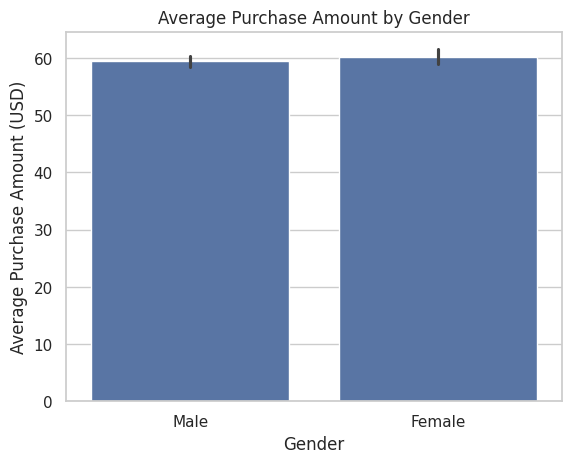

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df, x="gender", y="purchase_amount_usd")
plt.title("Average Purchase Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Purchase Amount (USD)")
plt.show()


## Q2. Which product categories generate most revenue?

Text(0, 0.5, 'Total Revenue Generated (USD)')

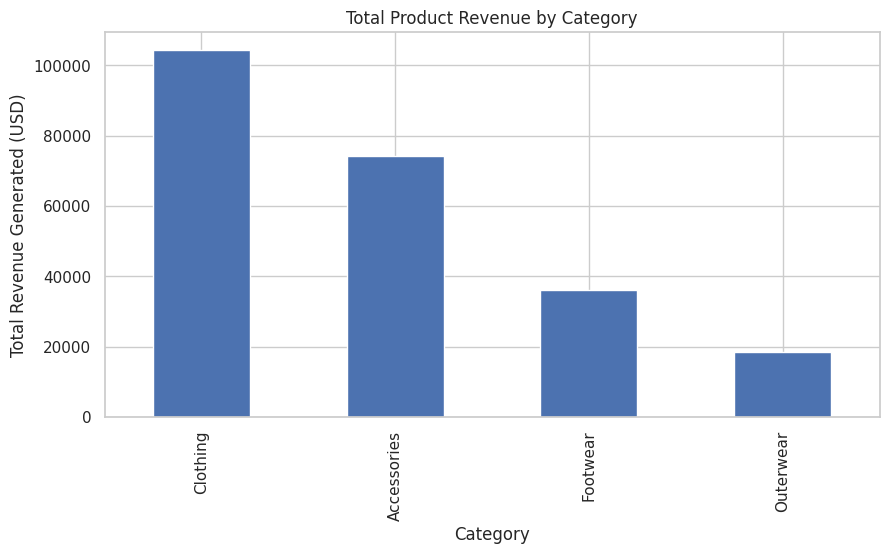

In [10]:
category_revenue = (
    df.groupby("category")["purchase_amount_usd"]
        .sum()
        .sort_values(ascending=False)
)

category_revenue.plot(kind="bar", figsize=(10,5))
plt.title("Total Product Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue Generated (USD)")

**Insight:**  
A small number of product categories contribute disproportionately to total revenue, indicating key focus areas for inventory and promotions.



## Q3. Do discounts increase the purchase amount?

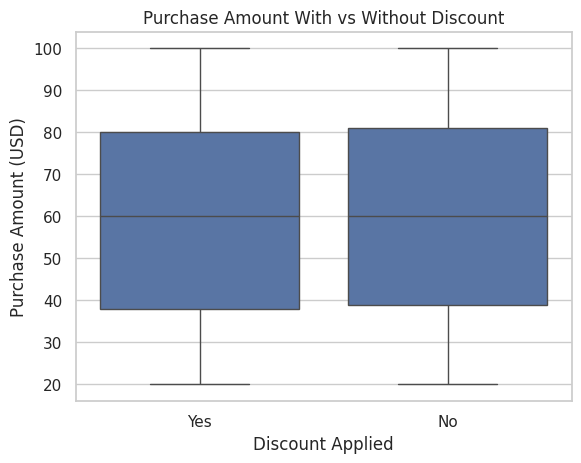

In [11]:
sns.boxplot(data=df, x="discount_applied", y="purchase_amount_usd")
plt.title("Purchase Amount With vs Without Discount")
plt.xlabel("Discount Applied")
plt.ylabel("Purchase Amount (USD)")
plt.show()

**Insight:**  
While discounts can encourage purchases, higher spending is not guaranteed. This suggests the need for targeted discount strategies rather than blanket promotions.


## Q4. Is there a relation between Age vs spending behavior?

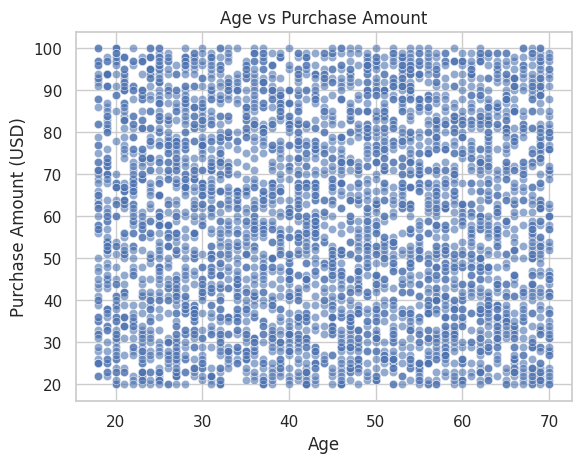

In [12]:
sns.scatterplot(data=df, x="age", y="purchase_amount_usd", alpha=0.6)
plt.title("Age vs Purchase Amount")
plt.xlabel("Age")
plt.ylabel("Purchase Amount (USD)")
plt.show()

**Insight:**  
The scatter plot shows no strong correlation between customer age and purchase amount. Customers across different age groups exhibit similar spending behavior, suggesting that age alone may not be a significant driver of purchase value.


# Key Insights & Business Takeaways



### Key Insights
- Customer spending is relatively consistent across different age groups, indicating that age alone is not a strong predictor of purchase amount.
- A small number of product categories contribute disproportionately to total revenue.
- Discounts influence purchasing behavior, but higher discounts do not always result in higher purchase amounts.
- Spending patterns vary across demographic segments, suggesting opportunities for targeted marketing.

### Business Takeaways
- Businesses should prioritize high-performing product categories to maximize revenue impact.
- Discount strategies should be targeted and data-driven rather than applied uniformly across all customers.
- Customer segmentation based on purchasing behavior and category preferences may be more effective than age-based targeting alone.
